In [26]:
from PIL import Image
import numpy as np
path = 'data\\2024-08i compl OADChi E2_02.tif'

In [27]:
picture = np.array(Image.open(path))[1320:2520, 1760:3360, 1] / 255.0
picture.shape

(1200, 1600)

In [28]:
import cv2 as cv
img = cv.imread(path, 0)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th2, th3]
inv = ~th3
res = cv.bitwise_and(img,inv)
#cv.imshow(titles[1],res)
#cv.waitKey(0)
cv.imwrite("result.jpg",res)
#cv.destroyAllWindows()

True

In [29]:
import cv2
img = cv2.imread(path)

20.0
Black Dots count is: 50


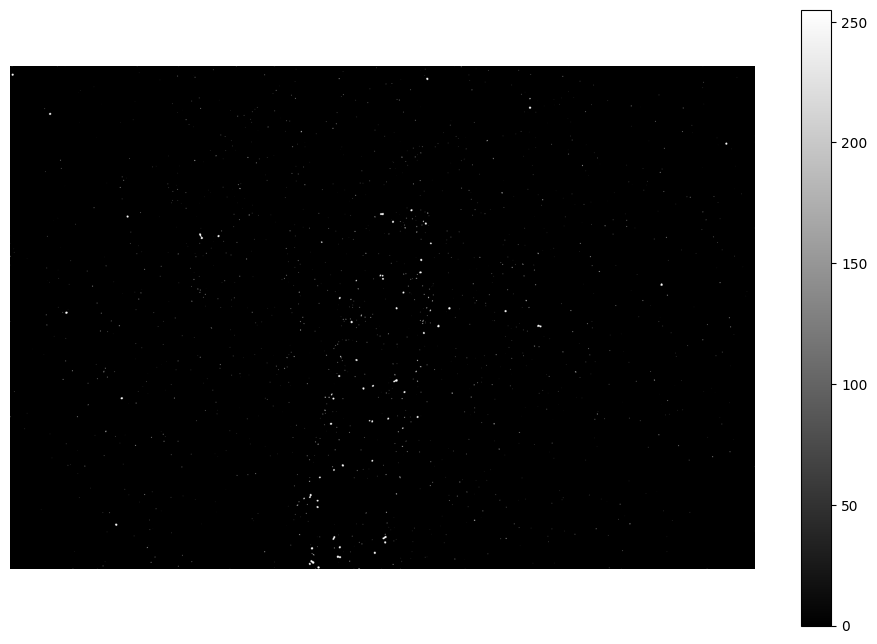

In [32]:
import cv2
import numpy as np

image = cv2.imread(path)

height = image.shape[0]
cutoff = int(height * 0.9)
image = image[:cutoff, :]

blur = cv2.medianBlur(image, 9)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,7,2)
thresh= cv2.medianBlur(thresh, 9)

thresh = cv2.threshold(thresh, 45, 255, cv2.THRESH_BINARY_INV)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 75
circularity_threshold = 0.7
black_dots = []
uncircular_dots = []

for c in cnts:
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    if perimeter == 0:
        continue  # Avoid division by zero
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    
    if area > min_area:
        if circularity > circularity_threshold:
            black_dots.append(c)
        else:
            uncircular_dots.append(c)

total_area = 0.0
for dot in black_dots:
    total_area += cv2.contourArea(dot)

average_dot_size = total_area/len(black_dots)
extra_dots = 0
clusters = []

for dot in uncircular_dots:
    dots_in_cluster = round(cv2.contourArea(dot)/average_dot_size,0)
    if dots_in_cluster > 1:
        clusters.append(dot)
        extra_dots += dots_in_cluster

print(extra_dots)

cv2.drawContours(image, black_dots, -1, (36, 255, 12), 2)  # Draw contours in green
cv2.drawContours(image, clusters, -1, (36, 55, 255), 2)  # Draw contours in red
cv2.imwrite('result_adapt_thresh.jpg', image)

print("Black Dots count is:", len(black_dots))
picture = np.array(thresh)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(picture, cmap='gray')
plt.axis('off'); plt.axis('image'); plt.colorbar()
plt.show()

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/commons/Themas/Thema11/GoldParticles/wildtype Mtb/2024-08i WT Mtb 2nd exp_D2_32.tif', 0)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th2, th3]
inv = ~th3
res = cv.bitwise_and(img,inv)

picture = np.array(th3)

plt.figure(figsize=(12, 8))
plt.imshow(picture, cmap='gray')
plt.axis('off'); plt.axis('image'); plt.colorbar()
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\box_filter.dispatch.cpp:446: error: (-215:Assertion failed) !_src.empty() in function 'cv::boxFilter'
